In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_absolute_percentage_error

In [57]:
hour =pd.read_csv('hour.csv')
display(hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [58]:
hour.drop("instant", axis=1, inplace=True)
display(hour.head())

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

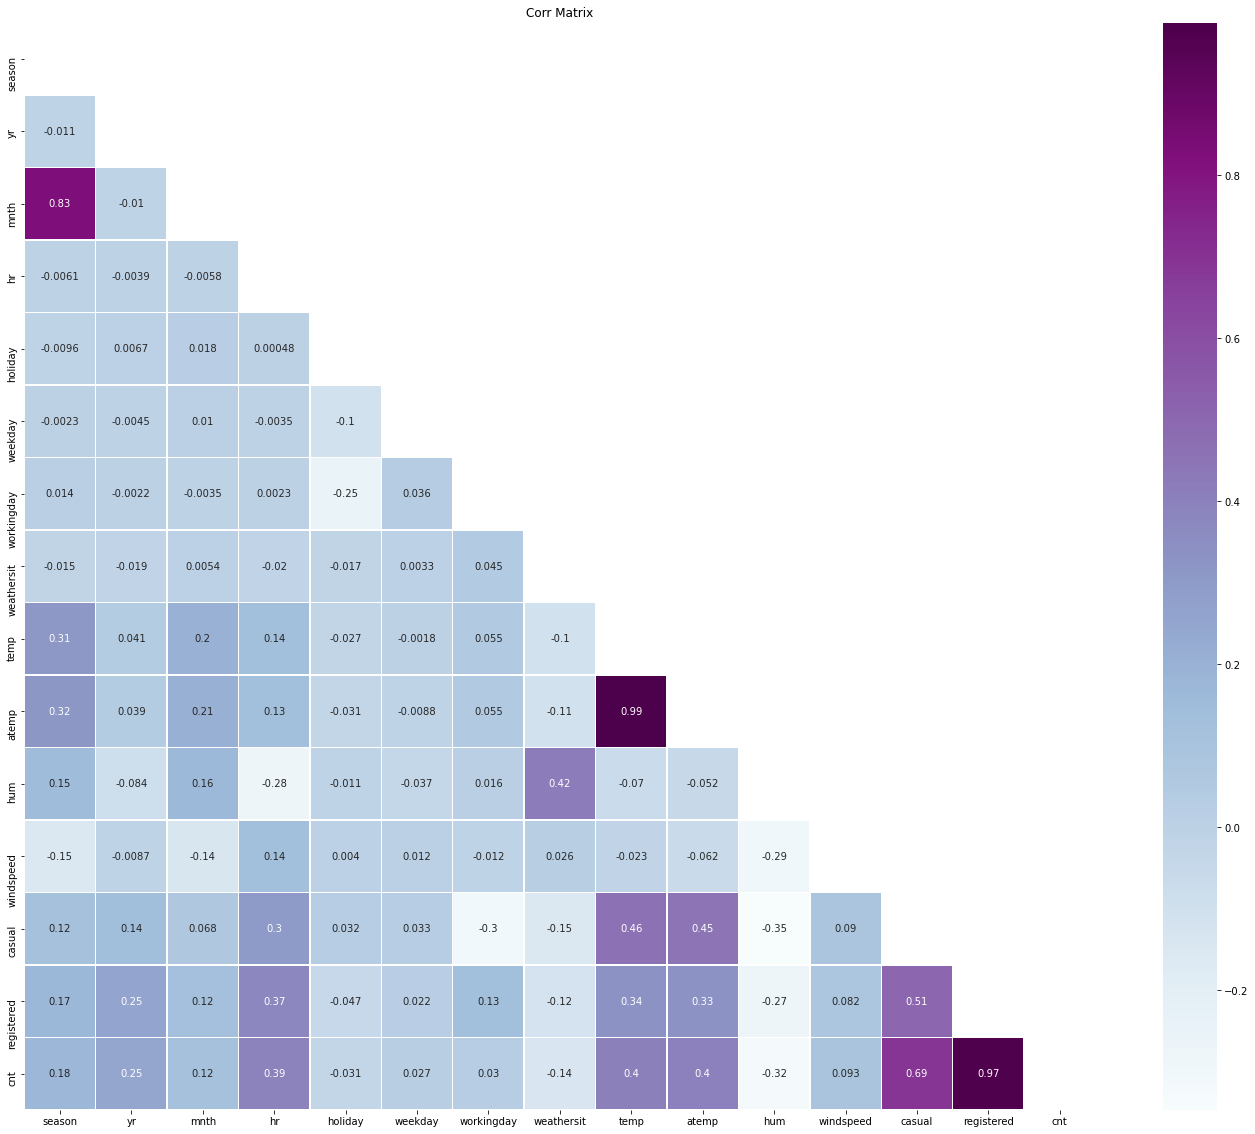

In [60]:
fig, ax = plt.subplots(figsize=(24,20))
ax.set_title("Corr Matrix")

mask1 = np.triu(np.ones_like(hour.corr()))

sns.heatmap(hour.corr(), mask=mask1, annot=True, linewidths=.5, ax=ax, cmap="BuPu")

plt.show()

In [61]:
hour.drop('atemp', axis=1, inplace=True)
hour.drop('season', axis=1, inplace=True)
hour.drop('cnt', axis=1, inplace=True)
hour.drop('dteday', axis=1, inplace=True)

In [62]:
hour.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13
1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32
2,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27
3,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10
4,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [63]:
hour = hour[hour["holiday"] == 0 ]
display(hour.head())

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13
1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32
2,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27
3,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10
4,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [64]:
hour.count

<bound method DataFrame.count of        yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       0     1   0        0        6           0           1  0.24  0.81   
1       0     1   1        0        6           0           1  0.22  0.80   
2       0     1   2        0        6           0           1  0.22  0.80   
3       0     1   3        0        6           0           1  0.24  0.75   
4       0     1   4        0        6           0           1  0.24  0.75   
...    ..   ...  ..      ...      ...         ...         ...   ...   ...   
17374   1    12  19        0        1           1           2  0.26  0.60   
17375   1    12  20        0        1           1           2  0.26  0.60   
17376   1    12  21        0        1           1           1  0.26  0.60   
17377   1    12  22        0        1           1           1  0.26  0.56   
17378   1    12  23        0        1           1           1  0.26  0.65   

       windspeed  casual  registered  
0  

In [65]:
lrdf = hour.copy()
display(lrdf.head())

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13
1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32
2,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27
3,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10
4,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1


In [66]:
hour.drop('holiday', axis=1, inplace=True)
hour.drop('weekday', axis=1, inplace=True)

In [67]:
new_season = pd.get_dummies(hour['mnth'], prefix='month', drop_first=False)
new_weather = pd.get_dummies(hour['weathersit'], prefix='weather', drop_first=False)
new_year = pd.get_dummies(hour['yr'], prefix='yr', drop_first=False)


In [68]:
hour.drop(['mnth', 'weathersit', 'yr'], axis=1, inplace=True)

hour = pd.concat([hour, new_season, new_weather, new_year], axis=1)
display(hour.head())

,hr,workingday,temp,hum,windspeed,casual,registered,month_1,month_2,month_3,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
0,0,0,0.24,0.81,0.0,3,13,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.22,0.80,0.0,8,32,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0.22,0.80,0.0,5,27,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0.24,0.75,0.0,3,10,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.24,0.75,0.0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [69]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16879 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hr          16879 non-null  int64  
 1   workingday  16879 non-null  int64  
 2   temp        16879 non-null  float64
 3   hum         16879 non-null  float64
 4   windspeed   16879 non-null  float64
 5   casual      16879 non-null  int64  
 6   registered  16879 non-null  int64  
 7   month_1     16879 non-null  uint8  
 8   month_2     16879 non-null  uint8  
 9   month_3     16879 non-null  uint8  
 10  month_4     16879 non-null  uint8  
 11  month_5     16879 non-null  uint8  
 12  month_6     16879 non-null  uint8  
 13  month_7     16879 non-null  uint8  
 14  month_8     16879 non-null  uint8  
 15  month_9     16879 non-null  uint8  
 16  month_10    16879 non-null  uint8  
 17  month_11    16879 non-null  uint8  
 18  month_12    16879 non-null  uint8  
 19  weather_1   16879 non-nul

In [70]:
cas = hour.copy()
reg = hour.copy()
display(cas.head())
display(reg.head())

,hr,workingday,temp,hum,windspeed,casual,registered,month_1,month_2,month_3,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
0,0,0,0.24,0.81,0.0,3,13,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.22,0.80,0.0,8,32,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0.22,0.80,0.0,5,27,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0.24,0.75,0.0,3,10,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.24,0.75,0.0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


,hr,workingday,temp,hum,windspeed,casual,registered,month_1,month_2,month_3,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
0,0,0,0.24,0.81,0.0,3,13,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.22,0.80,0.0,8,32,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0.22,0.80,0.0,5,27,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0.24,0.75,0.0,3,10,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.24,0.75,0.0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [71]:
cas.drop("registered", axis=1, inplace=True)
display(cas.head())

,hr,workingday,temp,hum,windspeed,casual,month_1,month_2,month_3,month_4,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
0,0,0,0.24,0.81,0.0,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.22,0.80,0.0,8,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0.22,0.80,0.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0.24,0.75,0.0,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.24,0.75,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [72]:
cas= cas[cas["casual"] > 0]
display(cas.head())

,hr,workingday,temp,hum,windspeed,casual,month_1,month_2,month_3,month_4,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
0,0,0,0.24,0.81,0.0,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.22,0.80,0.0,8,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0.22,0.80,0.0,5,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0.24,0.75,0.0,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,6,0,0.22,0.80,0.0,2,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [73]:
reg.drop("casual", axis=1, inplace=True)
display(reg.head())

,hr,workingday,temp,hum,windspeed,registered,month_1,month_2,month_3,month_4,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
0,0,0,0.24,0.81,0.0,13,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.22,0.80,0.0,32,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0.22,0.80,0.0,27,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0.24,0.75,0.0,10,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.24,0.75,0.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [74]:
reg= reg[reg["registered"] > 0]
display(reg.head())

,hr,workingday,temp,hum,windspeed,registered,month_1,month_2,month_3,month_4,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
0,0,0,0.24,0.81,0.0,13,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0.22,0.80,0.0,32,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,0,0.22,0.80,0.0,27,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,0,0.24,0.75,0.0,10,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,0,0.24,0.75,0.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [111]:
X = np.array(lrdf['temp']).reshape(-1, 1)
y = np.array(lrdf['registered']).reshape(-1, 1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [113]:
lin_df = LinearRegression()
lin_df.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred = lin_df.predict(X_test)

In [115]:
print("R2 Score: {}".format(r2_score(y_test, y_pred)));
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('EVS: {}'.format(explained_variance_score(y_test, y_pred)))

R2 Score: 0.08926026790475272
MSE: 20044.686224635127
MAE: 104.45380372564402
RMSE: 141.57925774856685
EVS: 0.08926949108415227


In [116]:
print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));
print("MSE: " +"{:.3}".format(mean_squared_error(y_test, y_pred)))

R2 Score: 0.0893
MSE: 2e+04


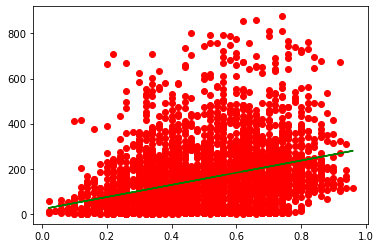

In [117]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

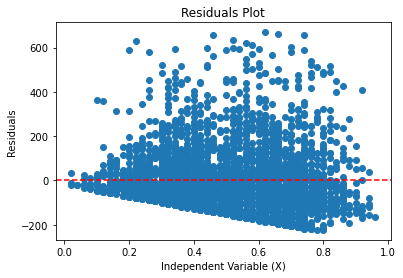

In [118]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a scatter plot of residuals against X
plt.scatter(X_test, residuals)
plt.xlabel("Independent Variable (X)")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

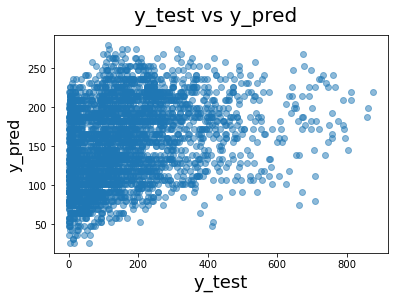

In [119]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()


In [168]:
cas_train, cas_test = train_test_split(cas, train_size = 0.80, test_size = 0.20, random_state = 42, stratify=cas["yr_0"])

In [169]:
y_train_c = cas_train.pop('casual')
X_train_c = cas_train
y_test_c = cas_test.pop("casual")
X_test_c = cas_test

In [150]:
display(X_train_c.head())


,hr,workingday,temp,hum,windspeed,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
11013,1,1,0.46,0.41,0.1343,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4816,14,0,0.86,0.50,0.2836,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13706,7,1,0.70,0.79,0.0896,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9822,5,0,0.26,0.48,0.2985,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11356,9,1,0.30,0.75,0.3881,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [161]:
reg_train, reg_test = train_test_split(reg, train_size = 0.80, test_size = 0.20, random_state = 42, stratify=reg["yr_0"])

In [162]:
y_train_r = reg_train.pop('registered')
X_train_r = reg_train
y_test_r = reg_test.pop("registered")
X_test_r = reg_test

In [156]:
display(y_train_r.head())
display(X_train_r.head())

2151     98
9644     85
4569    311
8651      1
1101    117
Name: registered, dtype: int64

,hr,workingday,temp,hum,windspeed,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3,weather_4,yr_0,yr_1
2151,12,1,0.64,0.36,0.4627,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
9644,19,0,0.20,0.40,0.5522,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4569,7,1,0.62,0.53,0.2537,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8651,6,0,0.26,0.93,0.1343,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1101,15,1,0.66,0.36,0.3284,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [157]:
scaler = MinMaxScaler()
x_cas_scl = scaler.fit_transform(X_train_c)
x_reg_scl = scaler.fit_transform(X_train_r)

In [158]:
x_cas_scl.shape

(12264, 23)

In [159]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train_r, y_train_r)

In [166]:
y_pred_r = mlin_df.predict(X_test_r)
def calculate_metrics(y_test_r, y_pred_r):
    print('R2 score: {}'.format(r2_score(y_test_r, y_pred_r)))
    print('Mean Squared Error: {}'.format(mean_squared_error(y_test_r, y_pred_r)))
    print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test_r, y_pred_r)))
    print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test_r, y_pred_r))))

calculate_metrics(y_test_r, y_pred_r)

R2 score: 0.325622442815068
Mean Squared Error: 15520.150648187222
Mean Absolute Error: 90.93586539445675
Root Mean Squared Error: 124.57989664543481


In [170]:
mlin_df = mlin_df.fit(X_train_c, y_train_c)

In [171]:
y_pred_c = mlin_df.predict(X_test_c)
def calculate_metrics(y_test_c, y_pred_c):
    print('R2 score: {}'.format(r2_score(y_test_c, y_pred_c)))
    print('Mean Squared Error: {}'.format(mean_squared_error(y_test_c, y_pred_c)))
    print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test_c, y_pred_c)))
    print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test_c, y_pred_c))))

calculate_metrics(y_test_c, y_pred_c)

R2 score: 0.4744356324596779
Mean Squared Error: 1268.4209888740734
Mean Absolute Error: 24.705476866509688
Root Mean Squared Error: 35.614898411677004


In [172]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 3)
transform_poly = poly_df.fit_transform(X_train_c)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train_c)

polynomial_predict = linreg2.predict(transform_poly)

In [190]:
rmse = np.sqrt(mean_squared_error(y_train_c,polynomial_predict))
r2 = r2_score(y_train_c,polynomial_predict)
print("RMSE Score for Test set: {}".format(rmse))
print("R2 Score for Test set: {}".format(r2))

RMSE Score for Test set: 21.477681803708908
R2 Score for Test set: 0.8170494033235276


In [191]:
poly_df = PolynomialFeatures(degree = 3)
transform_poly = poly_df.fit_transform(X_train_r)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train_r)

polynomial_predict = linreg2.predict(transform_poly)

In [193]:
rmse = np.sqrt(mean_squared_error(y_train_r,polynomial_predict))
r2 = r2_score(y_train_r,polynomial_predict)
print("RMSE Score for Test set: {}".format(rmse))
print("R2 Score for Test set: {}".format(r2))

RMSE Score for Test set: 98.6917655004194
R2 Score for Test set: 0.5802241652875295


In [189]:
y_cas2 = cas.pop("casual")
X_cas2 = cas

y_reg2 = reg.pop("registered")
X_reg2 = reg

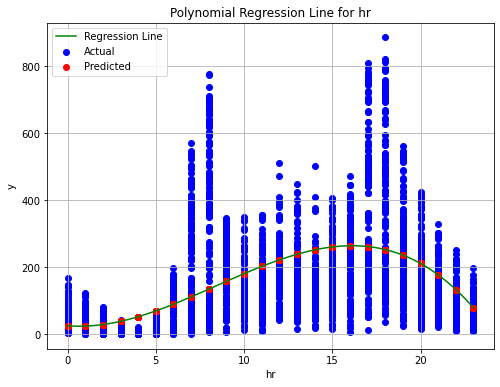

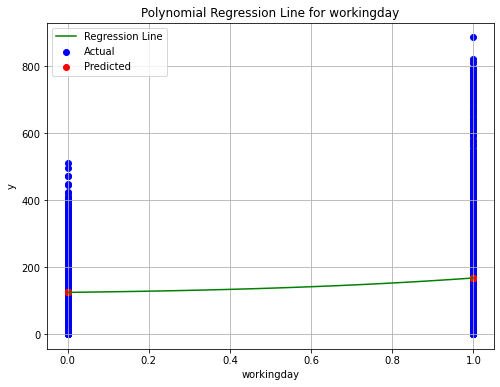

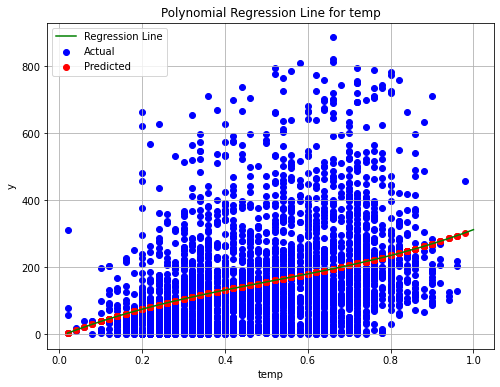

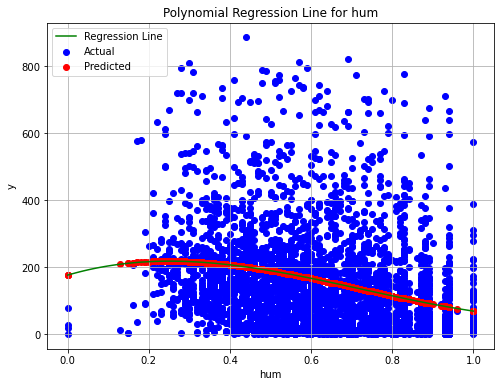

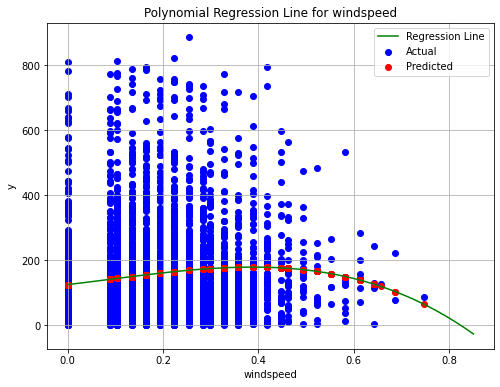

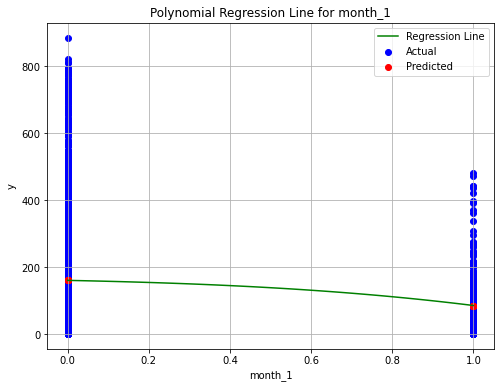

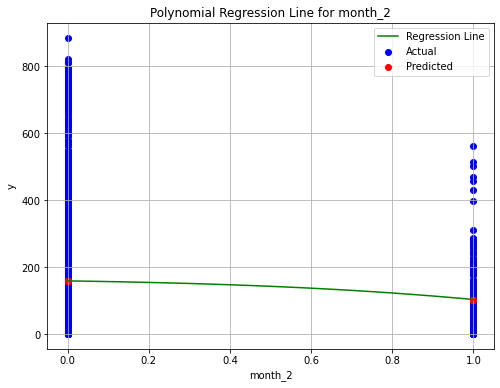

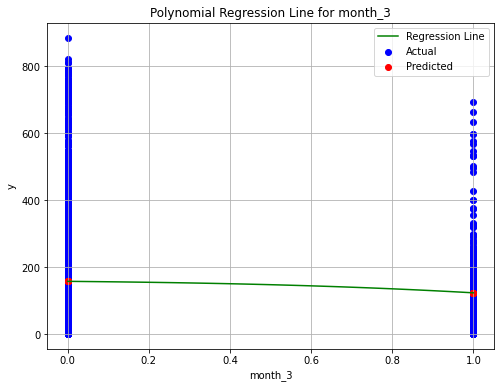

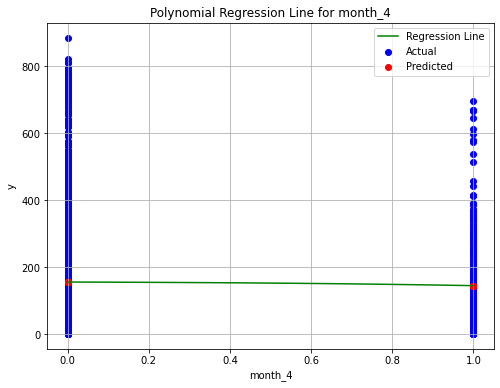

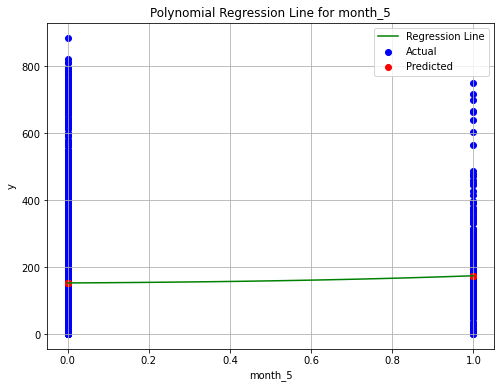

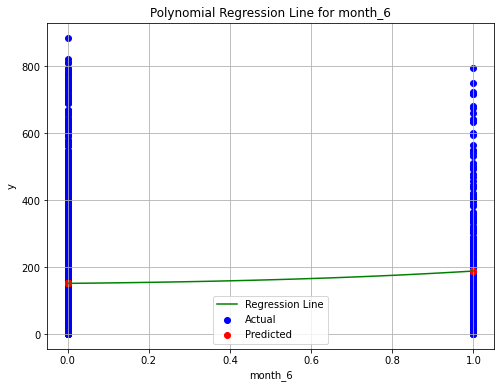

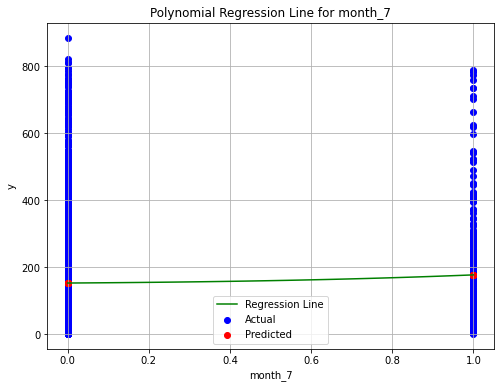

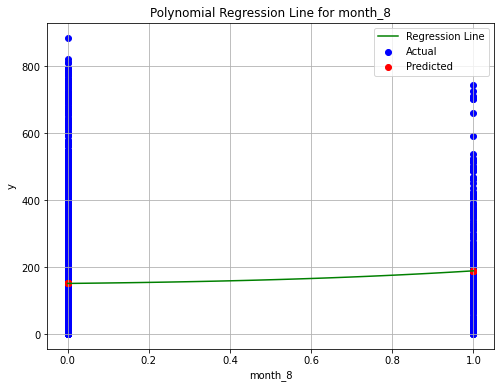

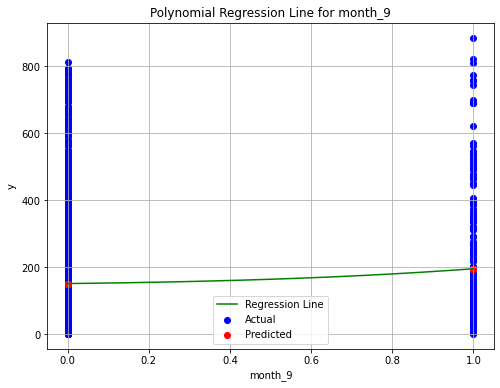

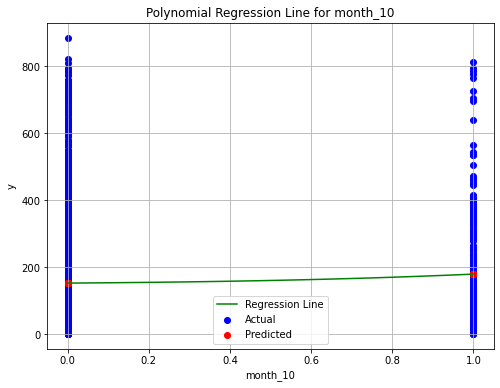

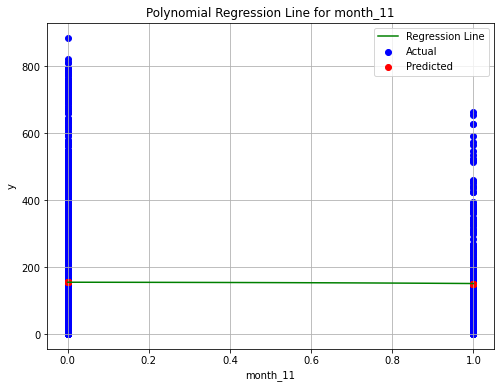

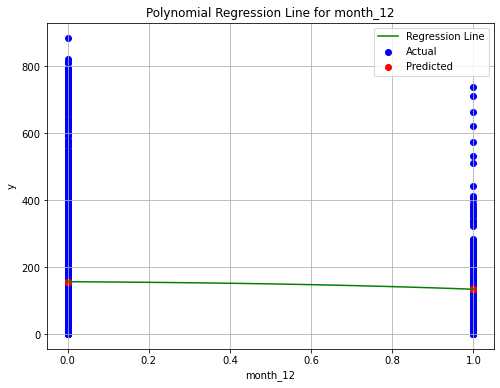

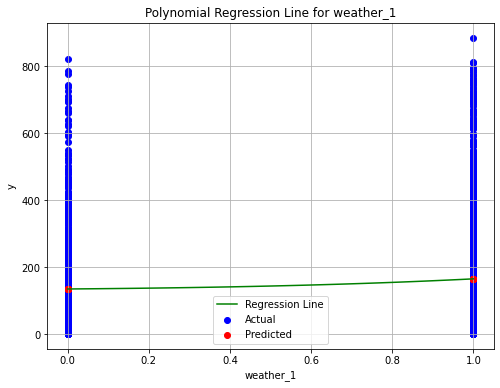

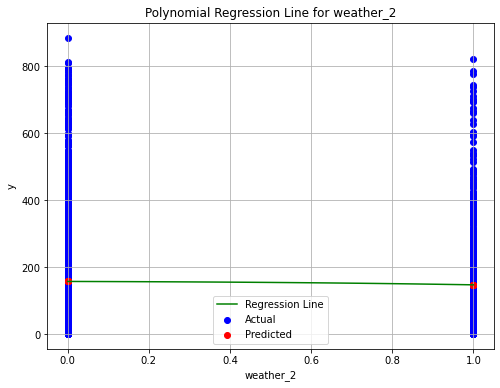

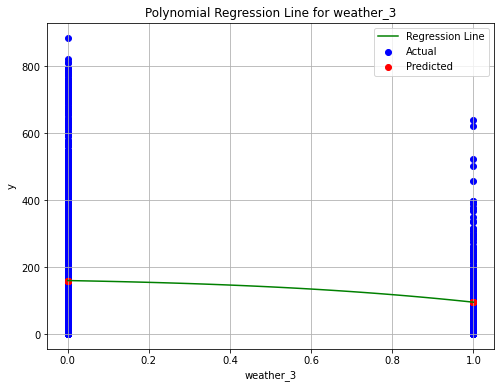

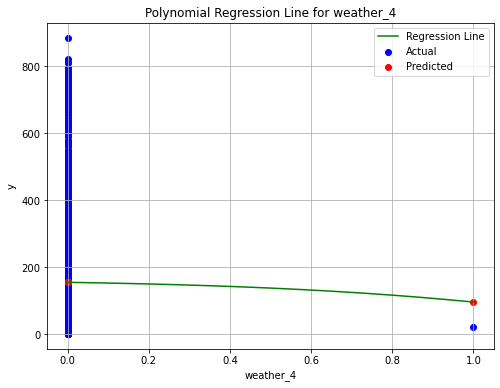

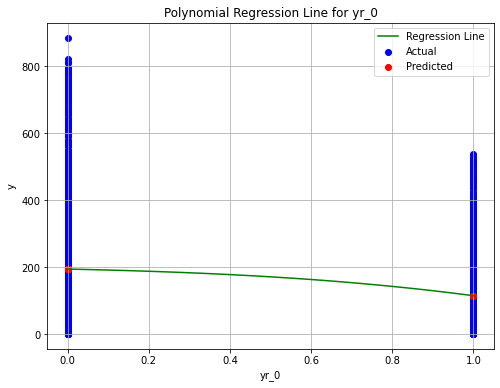

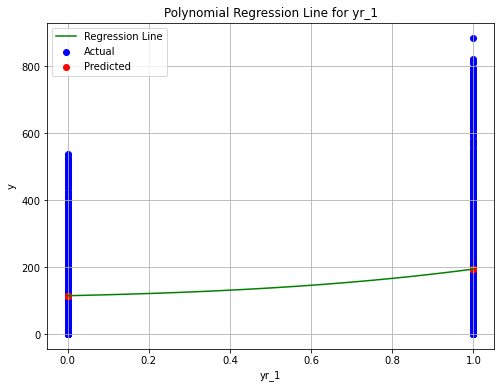

In [194]:
# Extract predictors and target variable
X = X_reg2
y = y_reg2

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the degree of the polynomial regression
degree = 3

# Iterate through each independent variable for visualization
for independent_variable in X.columns:
    # Fit polynomial regression model for the current independent variable
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[[independent_variable]])
    X_test_poly = poly.transform(X_test[[independent_variable]])
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions on the test set for the current independent variable
    y_pred = model.predict(X_test_poly)

    plt.figure(figsize=(8, 6))

    # Create a scatter plot of actual vs. predicted values for the current independent variable
    plt.scatter(X_test[independent_variable], y_test, label='Actual', color='blue')
    plt.scatter(X_test[independent_variable], y_pred, label='Predicted', color='red')

    # Generate values for the current independent variable to plot the polynomial regression line
    x_range = np.linspace(X[independent_variable].min(), X[independent_variable].max(), 100)
    x_range_poly = poly.transform(x_range.reshape(-1, 1))
    y_range_pred = model.predict(x_range_poly)

    plt.plot(x_range, y_range_pred, label='Regression Line', color='green')
    plt.xlabel(independent_variable)
    plt.ylabel("y")
    plt.legend()
    plt.title("Polynomial Regression Line for " + independent_variable)
    plt.grid(True)

    plt.show()